# Linear Regression

## Linear Regreesion Overview

### 머신러닝의 학습 방법들
- Surpervised의 경우, 4가지로 구성 가능
  - Gradient descent based learning
  - Probability theory based learning
  - Information theory based learning
  - Distance similarity based learning

### Gradient descent based learning
- 실제 값과 학습된 모델 예측치의 오차를 최소화하는 방식
- 모델의 최적 parameter 찾는 것을 목적으로, gradient descent 알고리즘을 활용한다

- 오차는 양수, 음수값 둘다 가질 수 있다
  - 오차를 모두 합하는 것을 지표로 사용하게 된다면, 음수와 양수가 서로 상쇄될 수 있다
  - 오차의 제곱합을 지표로 사용 (= 실제 값과 학습한 모델 예측치의 오차를 제곱)
  = Squared Error
- 해당 Squared Error를 최소화할 수 있는 Weight, 가중치의 값을 탐색!
- 미분으로 찾는다!

## Cost Function

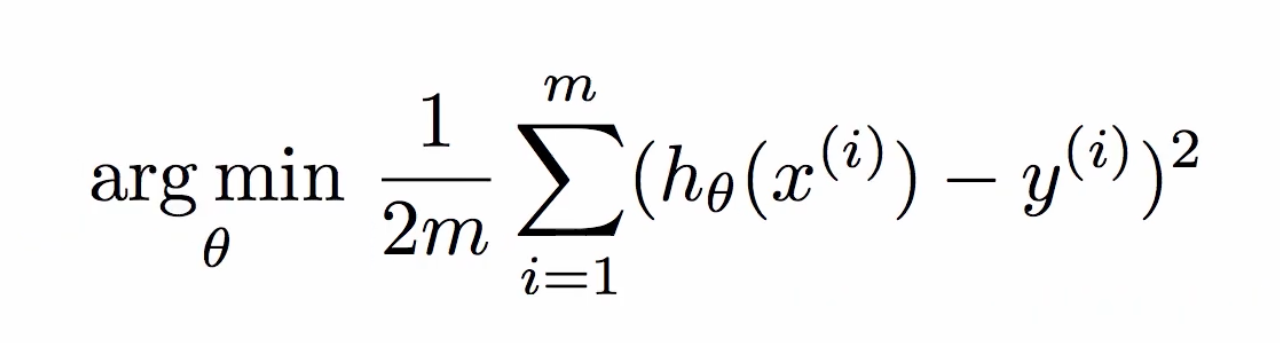

- 편미분해서 식을 0으로 두었을 때, 만족하는 w (가중치) 값 구차기!
- weights의 최적값을 컴퓨터가 찾는 방법
  - 연립방정식 풀기 (normal equation)
  - 경사하강법

## Normal Equation

- 즉, X^T X를 구할 경우, 해당 w 식에 대입하여 찾을 수 있다!
  - (X^T X)w = X^Ty 해당 식이 위에서 구하고자 했던 두 개의 방정식과 동일해지기 떄문!

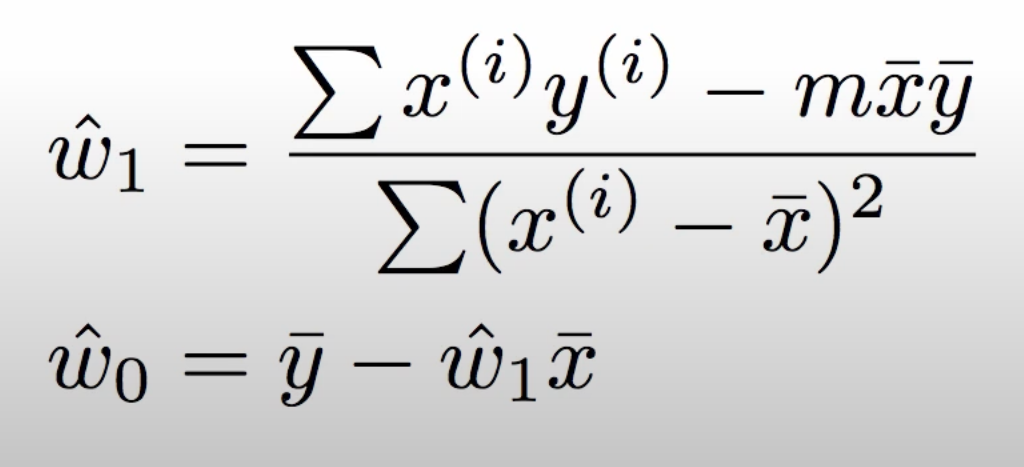

여러개의 변수일 경우,
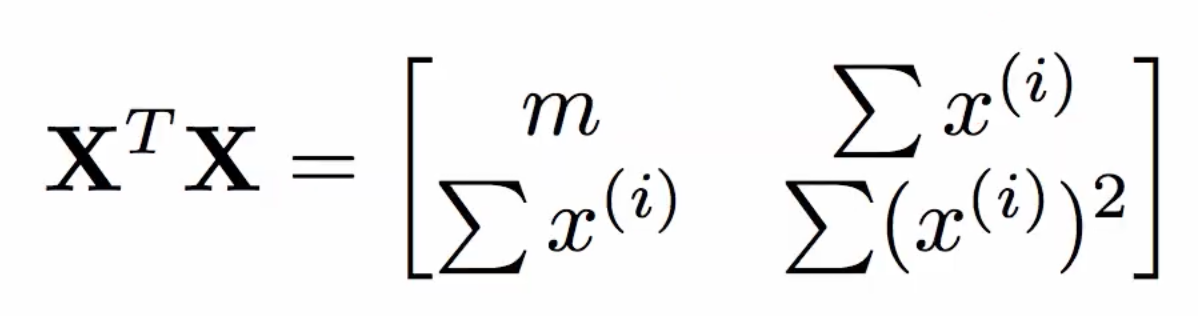
가 확대!

Normal Equation은!
- X^T X의 역행렬이 존재할 때 사용
- Iteration 등과 같이 사용자 지정 파라미터가 없다

## Gradient Descent Approach

$x_{new} = x_{old} - a * \frac{\partial y}{\partial x} x_{old}$

사용자가 지정해줘야 하는 것
- learning rate
- iteration

주의점
- 둘 중 하나가 너무 작을 경우, 시간이 오래걸리거나 최적값까지 못간다는 단점을 가지고 있음
- learning rate가 너무 클 경우, 데이터가 튀어서 수렴하지 못하는 경우가 생긴다
- 굴곡이 많은 함수의 경우, 시작점에 따라 Gradient Descent가 수렴하지 못할 수도 있다

In [1]:
import numpy as np
import matplotlib.pyplot as plt

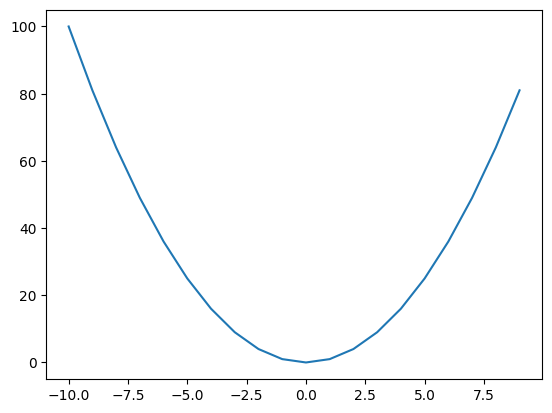

In [2]:
x= np.arange(-10,10,1)
f_x = x ** 2

plt.plot(x, f_x)
plt.show()

In [3]:
x_new = 10
derivative = []
y = []
learng_rate= 0.1
for i in range(100): # iteration 100회
    old_value = x_new
    derivative.append(old_value - learng_rate * 2 * old_value)
    x_new = old_value - learng_rate *2* old_value
    y.append(x_new ** 2)

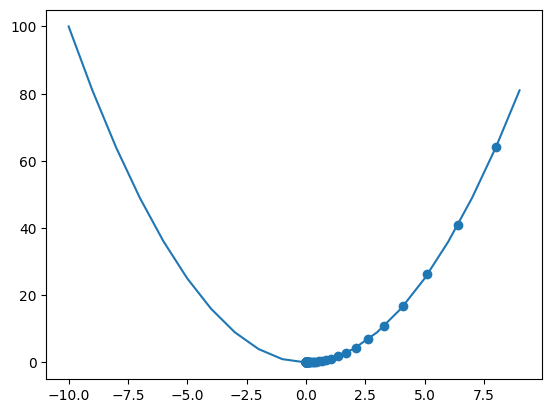

In [4]:
plt.plot(x, f_x)
plt.scatter(derivative, y)
plt.show()

In [5]:
def sin_function(x):
    return x * np.sin(x ** 2) + 1

def derivitive_f(x):
    return np.sin(x**2) + 2 * (x **2) * np.cos(x ** 2)

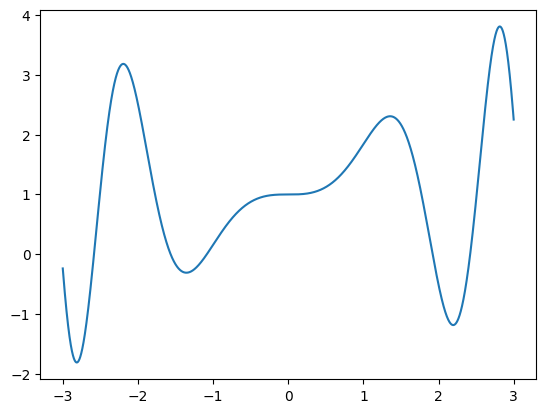

In [6]:
x= np.arange(-3,3,0.001)
f_x = sin_function(x)
plt.plot(x, f_x)
plt.show()

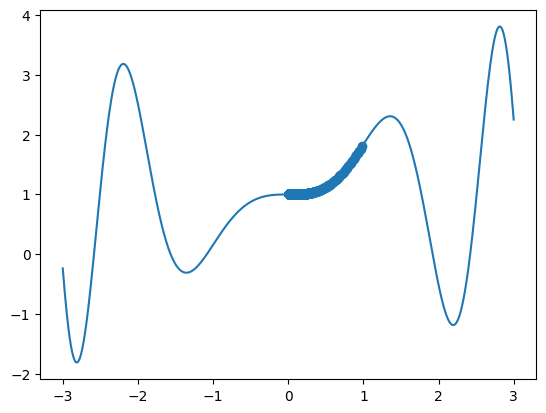

In [7]:
x_new = 1
derivative = []
y = []
learng_rate= 0.01
for i in range(10000):
    old_value = x_new
    x_new = old_value - learng_rate * derivitive_f(old_value)
    derivative.append(x_new)
    y.append(sin_function(x_new))

plt.plot(x, f_x)
plt.scatter(derivative, y)
plt.show()

## Linear Regression implementation with Numpy

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/TeamLab/machine_learning_from_scratch_with_python/master/code/ch7/data/slr06.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


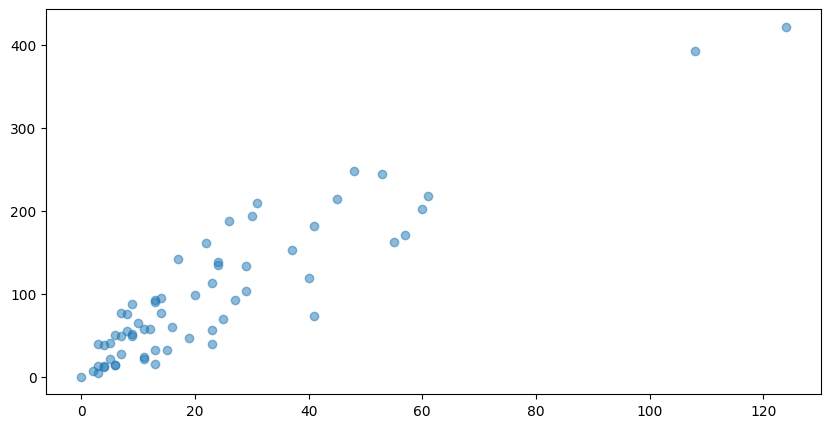

In [35]:
raw_X = df["X"].values.reshape(-1, 1) # 핸들링하기 쉽도록 각 value를 행렬로 만들어줌
y = df["Y"].values
plt.figure(figsize=(10,5))
plt.plot(raw_X, y, 'o', alpha=0.5)

In [11]:
raw_X[:5], y[:5] # 2차원, 1차원

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]]),
 array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [13]:
np.ones((len(raw_X), 1))[:3] # (len, 1)의 차원만큼 1을 채운 2차원 형성

array([[1.],
       [1.],
       [1.]])

In [36]:
X = np.concatenate( (np.ones((len(raw_X),1)), raw_X ), axis=1) # conca을 사용해 기존 x 값과 합침
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [37]:
w = np.random.normal((2,1)) # 정규분포에서 2개의 값을 뽑아옴 -> 직접 지정해줘도 된다
w

array([2.30098018, 0.50885614])

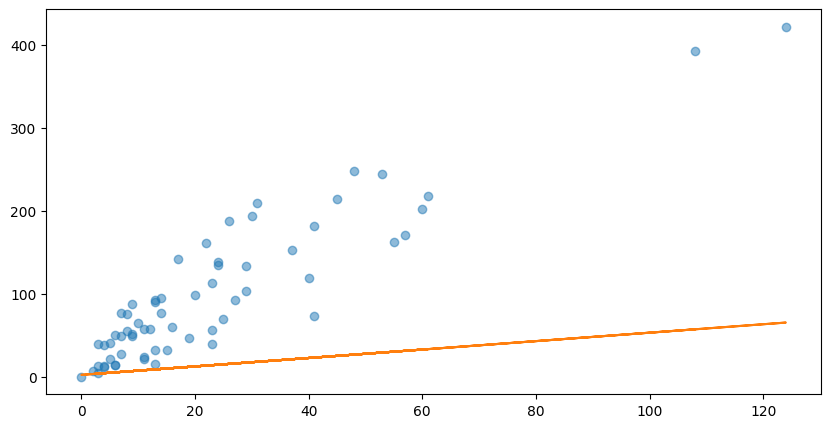

In [38]:
plt.figure(figsize=(10,5))
y_predict = np.dot(X, w)
# y^ = Xw로 가설함수를 만들어놓은 후,
plt.plot(raw_X, y, "o", alpha=0.5) # 실제 정답
plt.plot(raw_X, y_predict) # 예측값

### HYPOTHESIS AND COST FUNCTION

In [18]:
def hypothesis_function(X, theta): # 가설 함수
    return X.dot(theta)

def cost_function(h, y):
    return (1/(2*len(y))) * np.sum((h-y)**2)
    
h = hypothesis_function(X,w) # 실제 예측값을 가지고 담는 h
cost_function(h, y) # cost function 코드화

7718.015818980654

### GRADIENT DESCENT

In [19]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()] # 가중치값 저장
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations): # cost function이 0에 가깝게 갈 때까지 업데이트가 이루어진다
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1]) # 가중치 업데이트
        
        if i % 10== 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)


    return theta, theta_list, cost_list

### DO Linear regression with GD

In [20]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
# 최종적 theta값, theta_list, cost_list값

print("theta:", theta)
print('cost:', cost_function(hypothesis_function(X, theta), y))

theta: [19.87545176  3.41639379]
cost: 625.3745471160025


In [21]:
theta_list[:10]

[[1.2398662469393715, 0.18560708278860816],
 [1.3325623962406232, 4.041237207286025],
 [1.4218515580025324, 3.8148507768931736],
 [1.515510351757431, 3.8128284614269057],
 [1.6086968393465721, 3.810816344170998],
 [1.7014134025336414, 3.808814373697342],
 [1.7936624110714792, 3.806822498837354],
 [1.8854462227626458, 3.804840668680486],
 [1.9767671835196836, 3.802868832572922],
 [2.0676276274250767, 3.8009069401162865]]

In [22]:
theta_list = np.array(theta_list)

In [23]:
cost_list[:5]

[7718.015818980654,
 740.2050691275963,
 712.5841349772738,
 711.7067489714634,
 710.8381896852945]

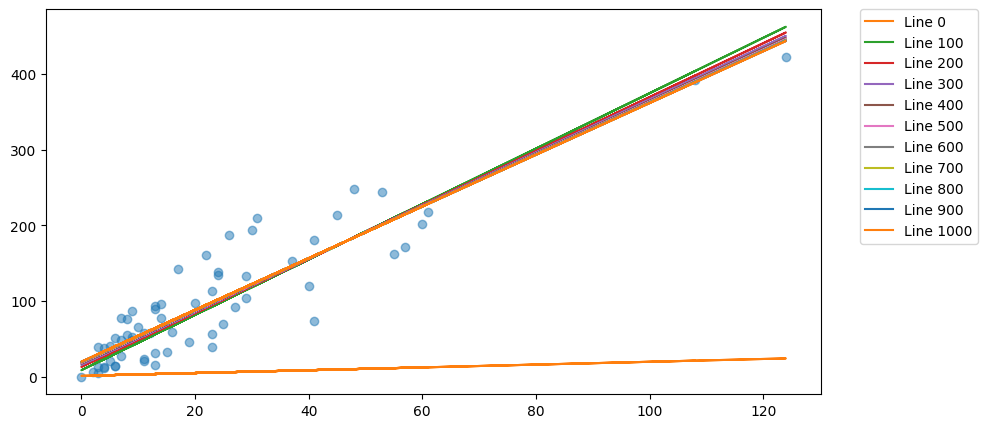

In [24]:
plt.figure(figsize=(10,5))

y_predict_step= np.dot(X, theta_list.transpose()) # 가중치와 X를 곱해 y 예측값을 구함

plt.plot(raw_X, y, "o", alpha=0.5)
for i in range (0, len(cost_list), 100): # 100번마다 그래프를 그려줌
    plt.plot(raw_X, y_predict_step[:,i], label='Line %d'%i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

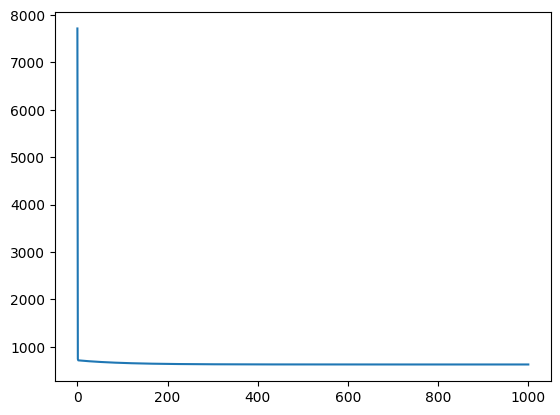

In [25]:
plt.plot(range(len(cost_list)), cost_list); # cost function 그래프

In [27]:
th0 = theta_list[:,0]
th1 = theta_list[:,1]
TH0, TH1 = np.meshgrid(th0, th1) # 격자 그리드

In [28]:
Js = np.array([cost_function(y, hypothesis_function(X, [th0, th1])) for th0, th1 in zip(np.ravel(TH0), np.ravel(TH1))])
# np.ravel() : 1차원으로 바꾸는 것 = flatten
Js = Js.reshape(TH0.shape) # cost 값

<a list of 7 text.Text objects>

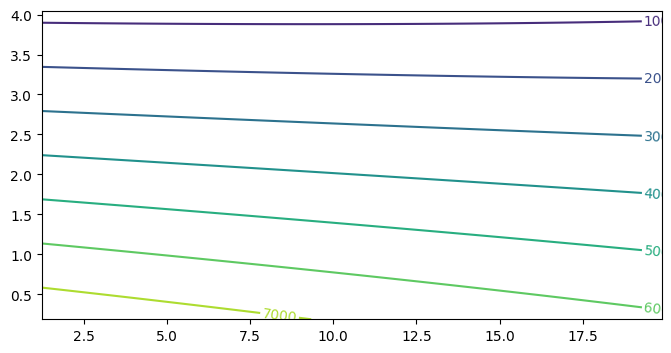

In [29]:
plt.figure(figsize=(8,4))
CS = plt.contour(TH0, TH1, Js)
plt.clabel(CS, inline=True, fontsize=10,inline_spacing=2)
# theta 0을 x로, theta 1을 y로 해서 그래프를 그려주는데, 서로의 관계에 따라 cost FUNCTION 값이 어떻게 변화하는지 볼 수 있음

In [30]:
from mpl_toolkits.mplot3d import Axes3D

ms = np.linspace(theta[0] - 15 , theta[0] + 15, 100)
bs = np.linspace(theta[1] - 15 , theta[1] + 15, 100)

M, B = np.meshgrid(ms, bs)

zs = np.array([cost_function(y, hypothesis_function(X, theta))
    for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

/var/folders/yr/33_dxfw93nzc66j2xmmvkxnw0000gn/T/ipykernel_90752/2907565628.py:5: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 10, color='b', alpha=0.5, offset=0, stride=30)


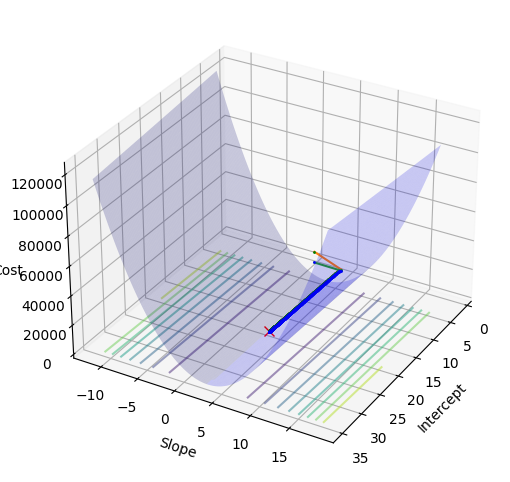

In [31]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 10, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('Intercept') # theta 0의 값
ax.set_ylabel('Slope') # theta 1의 값
ax.set_zlabel('Cost') # cost 값
ax.view_init(elev=30., azim=30)
ax.plot([theta[0]], [theta[1]], [cost_list[-1]] , markerfacecolor='r', markeredgecolor='r', marker='x', markersize=7);

ax.plot(theta_list[:,0], theta_list[:,1], cost_list, markerfacecolor='g', markeredgecolor='g', marker='o', 
                markersize=1);
ax.plot(theta_list[:,0], theta_list[:,1], 0 , markerfacecolor='b', markeredgecolor='b', marker='.', markersize=2);
# 실제 cost function이 어떤식으로 이동했는지를 그리는 것

## Multivariate Linear Regression Models

여러개의 변수가 있는 경우의 linear regression
- 식은 많아지지만, cost 함수 최적화를 이룬다는 점은 동일하다!
- 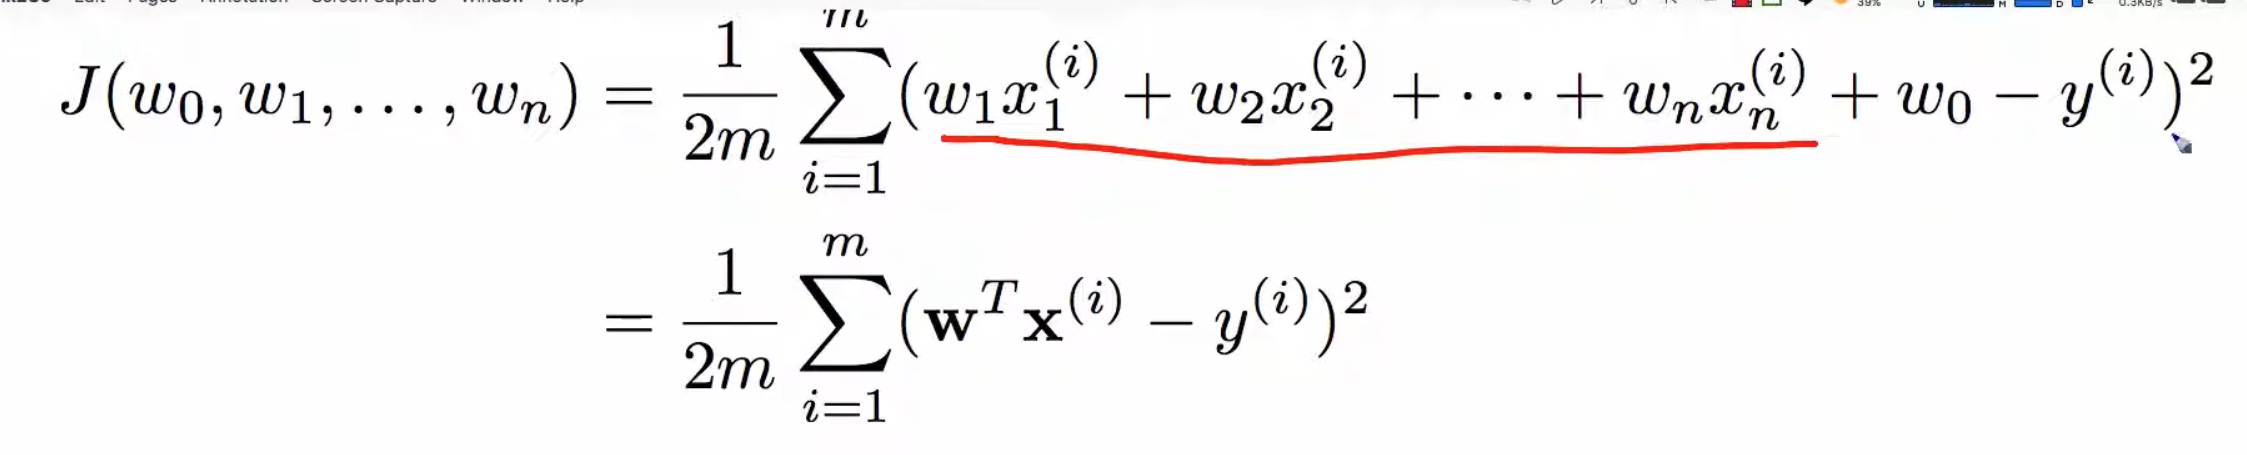
- 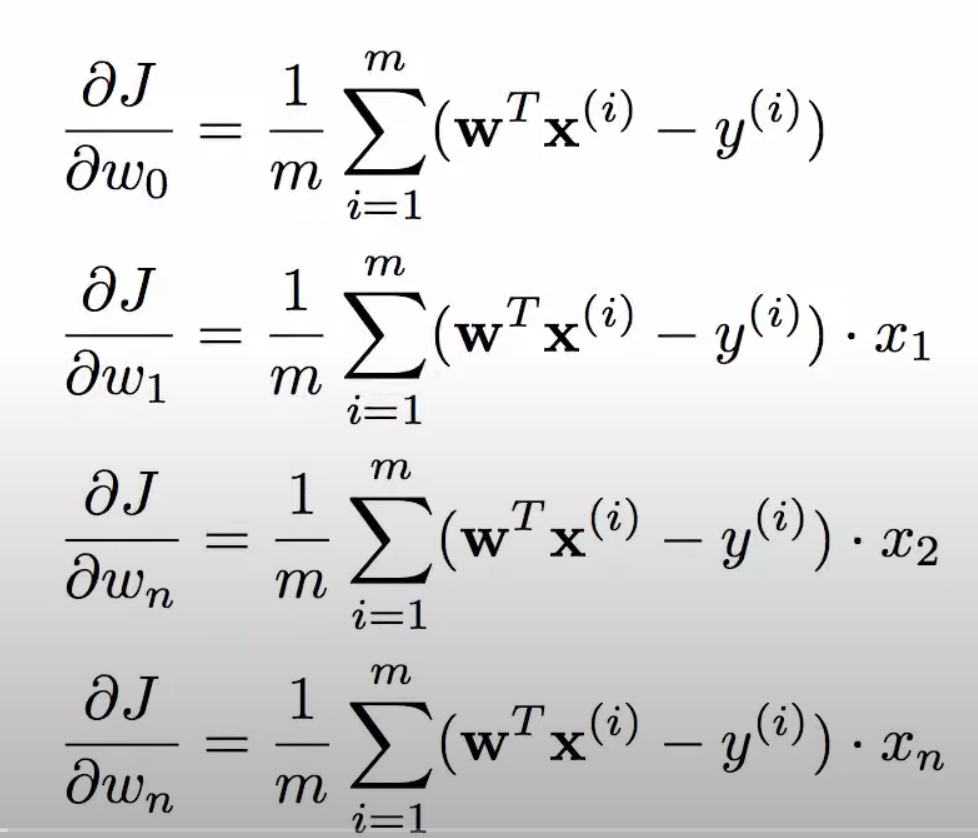
- 가중치가 각각 모두 업데이트가 이루어지고 난 이후, 동시에 최종 가중치가 업데이트 된다
  - 즉, 중간에 변하는 가중치 1, 2 ... 들이 이후 과정에 영향을 미치면 안된다는 것

In [41]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

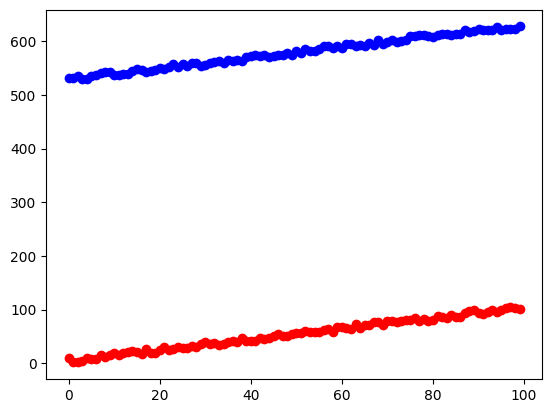

In [42]:
def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 3))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = random.uniform(0, 1) * variance + i
        x[i][1] = random.uniform(0, 1) * variance + i
        x[i][2] = 1
        # our target variable
        y[i] = (i+bias) + random.uniform(0, 1) * variance + 500
    return x, y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = gen_data(100, 25, 10) # 데이터 개수 : 100, 25 bias, 10 분산해서 데이터 생성

plt.plot(x[:, 0:1], "ro")
plt.plot(y, "bo")

plt.show()

In [66]:
x.shape # 100 x 3 데이터 생성

(100, 3)

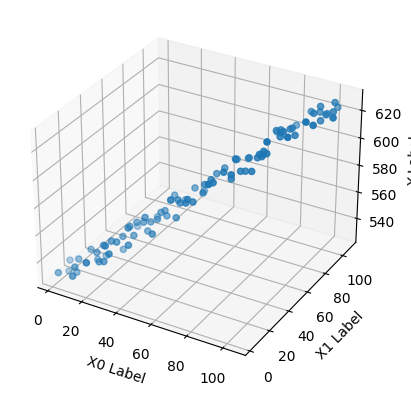

In [43]:
from mpl_toolkits.mplot3d import Axes3D
# 대략적인 형태

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y)

ax.set_xlabel('X0 Label')
ax.set_ylabel('X1 Label')
ax.set_zlabel('Y Label')

plt.show()

In [44]:
def compute_cost(x, y, theta):
# cost를 구하는 함수
    m = y.size
    predictions = x.dot(theta)
    sqErrors = (predictions - y)

    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)
    return J

def minimize_gradient(x, y, theta, iterations=100000, alpha=0.01):
  # gradient 함수
    m = y.size
    cost_history = []
    theta_history = []
    
    for _ in range(iterations):        
        predictions = x.dot(theta) # = W^T X = XW 함수
        
        for i in range(theta.size):
            partial_marginal = x[:, i]
            errors_xi = (predictions - y) * partial_marginal
            theta[i] = theta[i] - alpha * (1.0 / m) * errors_xi.sum() # 모든 가중치들에 대해 cost 편미분 식으로 업데이트
            # 만약 for문을 두 개로 나누지 않고 합쳐버린다면, 중간에 업데이트된 가중치들이 반영되어 업데이트가 이루어질 수 있으므로, for문을 분류하여 업데이트
        
        if _ % 1000 == 0:
            theta_history.append(theta)
            cost_history.append(compute_cost(x, y, theta))

    return theta, np.array(cost_history), np.array(theta_history)

In [45]:
theta_initial = np.ones(3) # 초기값을 달리해도 값에 영향을 준다

theta, cost_history, theta_history = minimize_gradient(
        x, y,theta_initial, 300000, 0.0001)
# learning rate : 30,0000 alpha : 0.0001
print("theta", theta)

theta [4.93949319e-01 5.10081583e-01 5.24255248e+02]


In [46]:
from sklearn import  linear_model
# sklearn에서 제공하는 실제 linear model 이용

regr = linear_model.LinearRegression()
regr.fit(x[:,:2], y)

# The coefficients
print('Coefficients: ', regr.coef_) # 실제 가중치값, w1 / w2
print('intercept: ', regr.intercept_) # w3

Coefficients:  [0.48837803 0.50541101]
intercept:  524.9714353370244


In [47]:
print(np.dot(theta, x[10])) # gradien 가중치를 이용해서 10번재 값을 예측한 값
print(regr.predict(x[10,:2].reshape(1,2))) # sklearn을 이용해 predict한 값
# 거의 유사하게 나오는 것을 확인할 수 있다

540.9457044780601
[541.48938569]


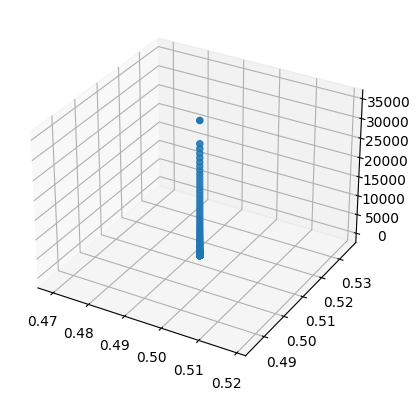

In [48]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(theta_history[:,0], theta_history[:,1], cost_history, zdir="z")
# weight값 에 따라 cost가 변화하는 값 그래프로 생성
plt.show()

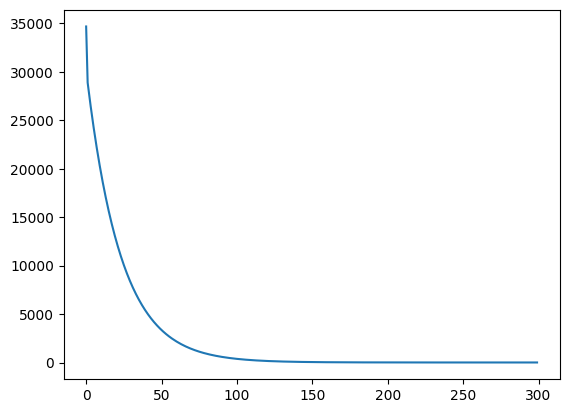

In [49]:
plt.plot(cost_history)
plt.show()

## Performance Measure for A Regression Model

성능을 평가하는 지표

### Mean Absolute Error
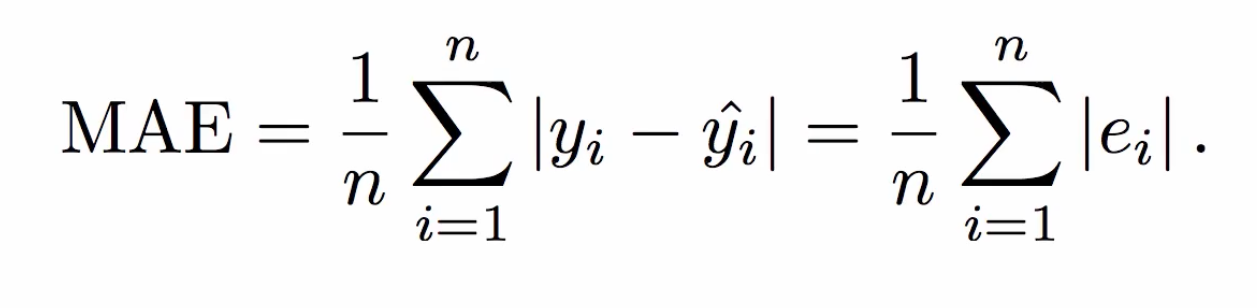

In [67]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

### Root Mean Squared Error (RMSE)
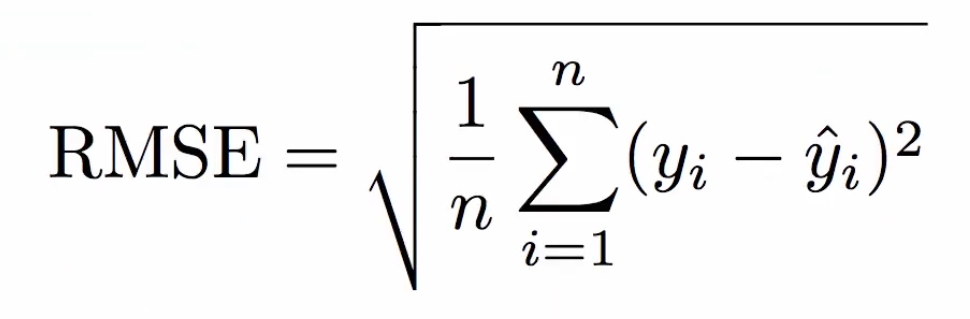

In [68]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

### R squared
- 0과 1 사이 숫자, 크면 클수록 높은 적합도를 지닌다

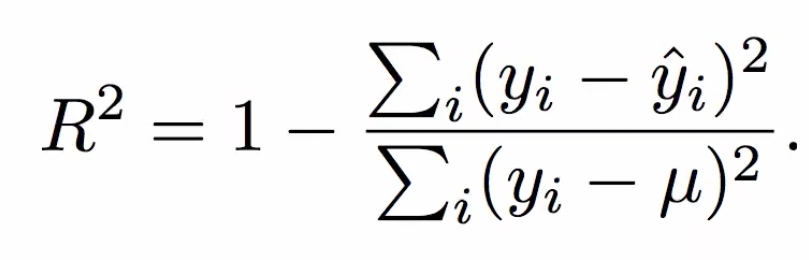

In [69]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

### Training & Test dataset
- Training한 데이터로 다시 Test를 할 경우, Training 데이터에 과도하게 fitting된 모델을 사용될 수 있다
- 새로운 데이터가 출현했을 때, 기존 모델과의 차이 존재할 수밖에 없다!
  - 새로운 데이터가 처리 가능하도록 generalize 되어야 한다
- 이를 위해 training set과 test set을 분리한다

### Holdout Method (Sampling)
- 데이터를 Training과 Test와 나누어 모델을 생성하고 테스트하는 기법
- 가장 일반적인 모델 생성을 위한 데이터 랜덤 샘플링 기법
- Training과 Test를 나누는 비율은 데이터의 크기에 따라 다름
- 일반적으로 Training Data 2/3, Test Data 1/3을 활용한다

In [70]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.33, random_state=42
)

## Linear Regression Implementation with Scijit-learn

In [50]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np

In [71]:
boston = load_boston()

x_data = boston.data
y_data = boston.target.reshape(boston.target.size, 1)

/Users/lee/opt/anaconda3/envs/workspace/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

In [72]:
x_data.shape

(506, 13)

In [53]:
y_data.shape

(506, 1)

In [78]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,5)).fit(x_data) # minmax를 변환시켜줄 수 있는 함수를 만드는 것
  # feature_range=(0,5) : 0~5사이 값으로 scaling 이루어짐
# standard_scale = preprocessing.StandardScaler().fit(x_data) # standardzation
x_scaled_data = minmax_scale.transform(x_data)

x_scaled_data[:3] # 스케일링이 된 x_data

array([[0.00000000e+00, 9.00000000e-01, 3.39076246e-01, 0.00000000e+00,
        1.57407407e+00, 2.88752635e+00, 3.20803296e+00, 1.34601570e+00,
        0.00000000e+00, 1.04007634e+00, 1.43617021e+00, 5.00000000e+00,
        4.48399558e-01],
       [1.17961270e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 2.73998850e+00, 3.91349125e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 5.00000000e+00,
        1.02235099e+00],
       [1.17848872e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 3.47192949e+00, 2.99691040e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 4.94868627e+00,
        3.17328918e-01]])

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y_data, test_size=0.33)

In [80]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((339, 13), (167, 13), (339, 1), (167, 1))

In [82]:
from sklearn import  linear_model

regr = linear_model.LinearRegression(fit_intercept=True, 
                                     normalize=False, 
                                     copy_X=True, 
                                     n_jobs=8)
# fit_intercept : 절편값을 넣을 것인지, copy_X : 모델을 학습하다보면 x 값이 변환될 수 있어서 x를 복사해서 학습시킬건지 여부, n_jobs : 몇개의 지표를 사용해서 할 것인지

regr.fit(X_train, y_train)

# # The coefficients
print('Coefficients: ', regr.coef_) # W1 ~ W13 값
print('intercept: ', regr.intercept_)  # W0 = 절편 값

Coefficients:  [[-2.39121822  0.94547887  0.1308073   0.49349656 -1.75028591  3.97845163
   0.38751913 -3.28627874  1.45133064 -1.17682491 -1.68065034  0.83066306
  -4.45307484]]
intercept:  [25.57048592]


/Users/lee/opt/anaconda3/envs/workspace/lib/python3.10/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [83]:
regr.predict(x_data[:5]) 
# 알고 싶은 데이터를 넣게 될 경우, 그에 따른 predict 값을 출력해준다

array([[14.82925399],
       [42.59124926],
       [58.10740746],
       [77.02733729],
       [72.03033364]])

In [84]:
x_data[:5].dot(regr.coef_.T) + regr.intercept_ # 실제 coef_와 X의 곱과 절편을 더해준 것과 동일한 값이 나온다

array([[14.82925399],
       [42.59124926],
       [58.10740746],
       [77.02733729],
       [72.03033364]])

In [62]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [63]:
y_true = y_test
y_hat = regr.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat) # 실제 값과 예측한 값 성능 비교

(0.7198912604296924, 3.1735394570994324, 18.678954828510808)

# Linear Regression extended